### (Juicy stuff from middle down)

# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [5]:
import pandas as  pd

df = pd.read_csv('states0.csv')

print(df.head(), '\n\n', df.shape)

# we will need to wrangle and tidy the percentile and income formats at at least
# we may think about tidying by adding "Ethnicity" column and single percentile col -> less columns, more observations

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F   

 (6, 11)


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob

states = glob.glob('states*.csv')
print(states)

state_dfs = []

for state in states:
    df = pd.read_csv(state)
    state_dfs.append(df)

print(len(state_dfs))

for df in state_dfs:
    print(df.shape)
    print(df.columns)

['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']
10
(6, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
(6, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
(6, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
(6, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
(6, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
(6, 11)
Index(['Unnamed: 0', 'S

In [8]:
# same columns, alse same sizes, can be easily concatenated

df_all = pd.concat(state_dfs, ignore_index=True)
print(df_all.head(), '\n\n', df_all.shape)

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F   

 (60, 11)


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [10]:
us_census = df_all

print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [12]:
# that's because of the percentiles and income format

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [15]:
us_census['Income'] = us_census['Income'].apply(lambda x: x.replace('$', ''))
us_census.head()

print(list(us_census['Income'][0:10]))

#the whitespace seem to obstacle to_numeric conversion
replacables = ['$', ' ', '\n', ',']
for replacable in replacables:
    us_census['Income'] = us_census['Income'].apply(lambda x: x.replace(replacable, ''))

print(list(us_census['Income'][0:10]))

us_census['Income'] = pd.to_numeric(us_census['Income'])
print(us_census.head())
print(us_census.dtypes)

['43,296.36 ', '70,354.74 ', '54,207.82 ', '41,935.63 ', '67,264.78 ', '64,657.80 ', '64,657.80 ', '76,146.56 ', '61,827.98 ', '75,466.36 ']
['43296.36', '70354.74', '54207.82', '41935.63', '67264.78', '64657.80', '64657.80', '76146.56', '61827.98', '75466.36']
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop  
0   0.03%  43296.36    2341093M_2489527F  
1   1.06%  70354.74      384160M_349215F  
2   0.17%  54207.82    3299088M_3342840F  
3   0.15%  41935.63    1451913M_1506295F  
4   0.35%  67264.78  19087135M_19334329F  

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [17]:
print(us_census.head())
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop  
0   0.03%  43296.36    2341093M_2489527F  
1   1.06%  70354.74      384160M_349215F  
2   0.17%  54207.82    3299088M_3342840F  
3   0.15%  41935.63    1451913M_1506295F  
4   0.35%  67264.78  19087135M_19334329F  
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Ari

In [18]:
us_census['Men'] = us_census['Men'].str.replace('\D', '', regex=True)
us_census['Women'] = us_census['Women'].str.replace('\D', '', regex=True)
us_census = us_census.drop('GenderPop', axis=1)
print(us_census.dtypes)
us_census.head()

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
Men            object
Women          object
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [20]:
for gender in ['Men', 'Women']:
    us_census[gender] = pd.to_numeric(us_census[gender])

In [21]:
print(us_census.dtypes)
# float for Women? Aha there are NaNs

print('Null values? ', us_census.isnull().sum())
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print('Still any null values in Women? ', us_census['Women'].isnull().sum())

#float to integer
us_census['Women'] = us_census['Women'].astype('int64')
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
Men             int64
Women         float64
dtype: object
Null values?  Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
Men           0
Women         3
dtype: int64
Still any null values in Women?  0
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
Men             int64
Women           int64
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

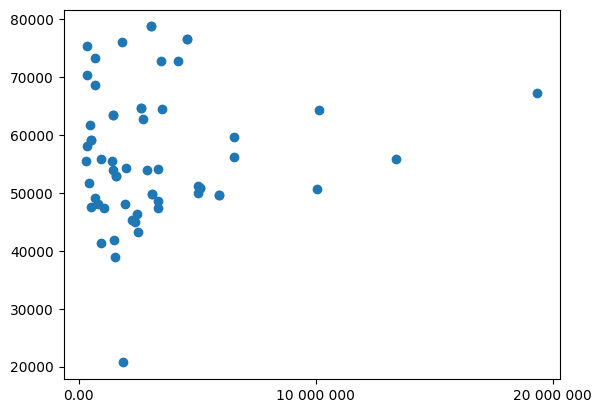

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.xticks([0, 1e7, 2e7], ['0.00', '10 000 000', '20 000 000'])
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [25]:
# I dealt with missing pop in Women, will do the same for Pacific

us_census['Pacific'] = us_census['Pacific'].fillna('0.00%')
print(us_census.isnull().sum())

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       0
Income        0
Men           0
Women         0
dtype: int64


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [27]:
print(us_census.duplicated().sum())
print(us_census['Women'].duplicated().sum())

0
9


11. Drop those duplicates using the `.drop_duplicates()` function.

In [29]:
#don't have any but ok
us_census.drop_duplicates(subset=['Women'], inplace=True)
print('Any duplicates in Women left ?', us_census['Women'].duplicated().sum())
print('Any nulls in Women left ?', us_census['Women'].isnull().sum())

us_census.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

print(us_census['Women'])

Any duplicates in Women left ? 0
Any nulls in Women left ? 0
0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
13      696428
14      806083
15     6556862
16     3333382
17     1558931
19     1453125
20     2233145
21     2364097
22      679019
23     3057895
25     3455936
26     5038598
27     2727005
28     1536358
29     3081445
31      504536
32      939759
33     1390901
34      670717
35     4561386
37     1051703
38    10131373
39     5049925
40      353677
41     5913084
43     1942789
44     1990780
45     6534215
46     1869213
47      543273
49     2455167
50      419713
51     3331859
52    13367298
53     1444150
55      318031
56     4195682
57     3497739
58      937789
59     2890732
Name: Women, dtype: int64


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

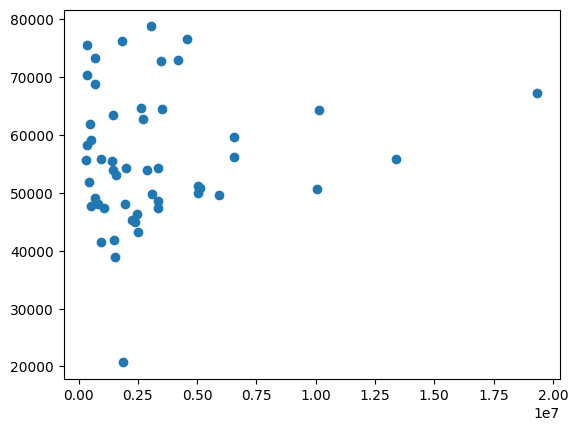

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [34]:
print(us_census.columns)
us_census.head()

Index(['Index', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


,Index,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [36]:
ethnics = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
replacables = ['%', ' ', '\n']

for ethnic in ethnics:
    for replacable in replacables:
        us_census[ethnic] = us_census[ethnic].str.replace(replacable, '')

#NaNs were dealt with above
print(us_census.dtypes)
for ethnic in ethnics:
    us_census[ethnic] = pd.to_numeric(us_census[ethnic])
print(us_census.dtypes)
print('any nulls? ', us_census.isnull().sum())
print('any duplicates? ', us_census.duplicated().sum())
us_census.head()

Index         int64
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Men           int64
Women         int64
dtype: object
Index         int64
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women         int64
dtype: object
any nulls?  Index       0
State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     0
Income      0
Men         0
Women       0
dtype: int64
any duplicates?  0


,Index,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


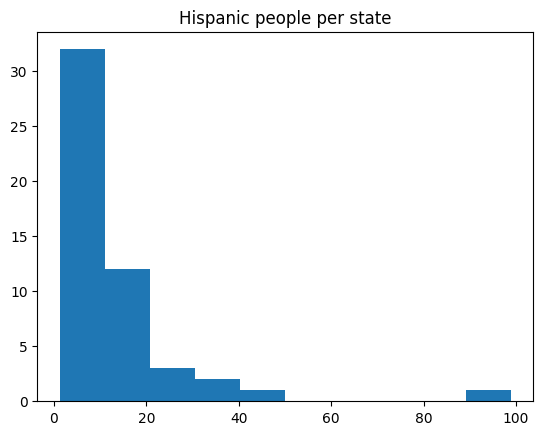

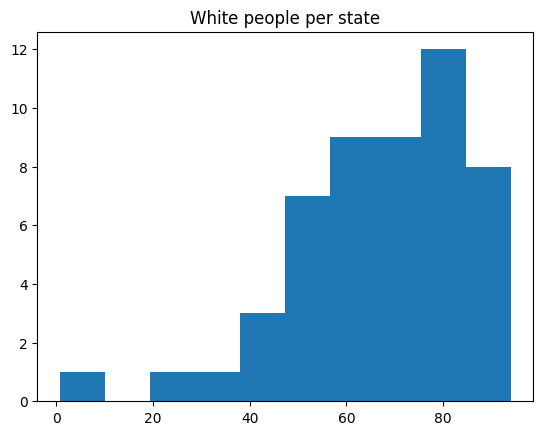

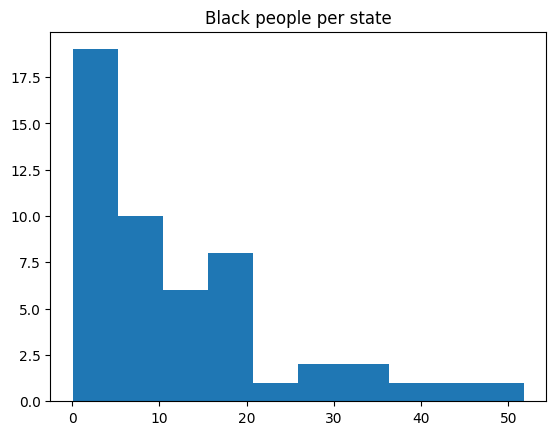

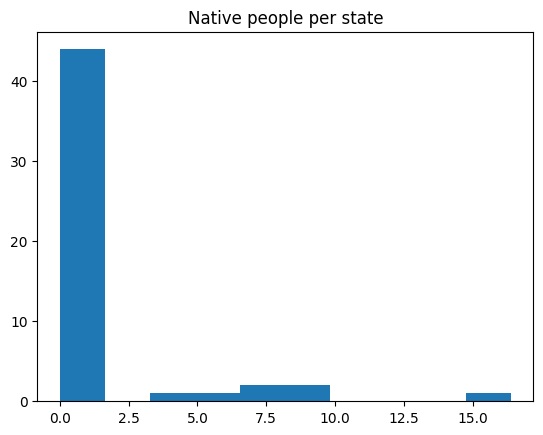

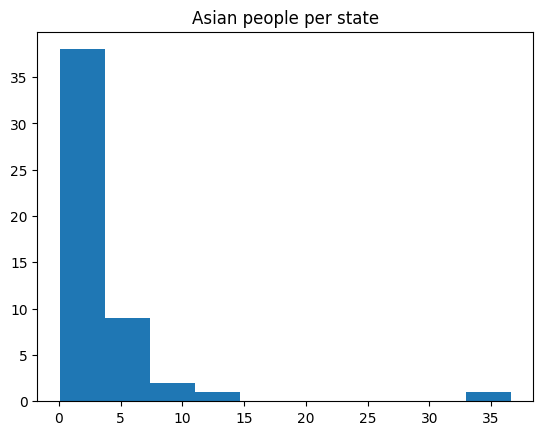

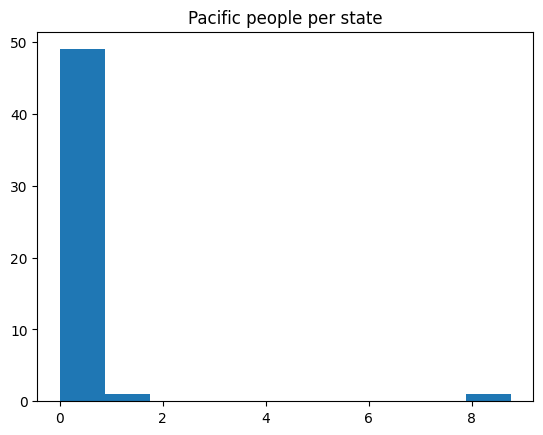

In [61]:
states = us_census['State']

for ethnic in ethnics:
    plt.hist(us_census[ethnic])
    plt.title(f'{ethnic} people per state')
    plt.show()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

   Index       State  TotalPop  Hispanic  White  Black  Native  Asian  \
0      0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1      1      Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2      2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88   
3      3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14   
4      4  California  38421464     37.29  40.22   5.68    0.41  13.05   

   Pacific    Income       Men     Women  
0     0.03  43296.36   2341093   2489527  
1     1.06  70354.74    384160    349215  
2     0.17  54207.82   3299088   3342840  
3     0.15  41935.63   1451913   1506295  
4     0.35  67264.78  19087135  19334329  


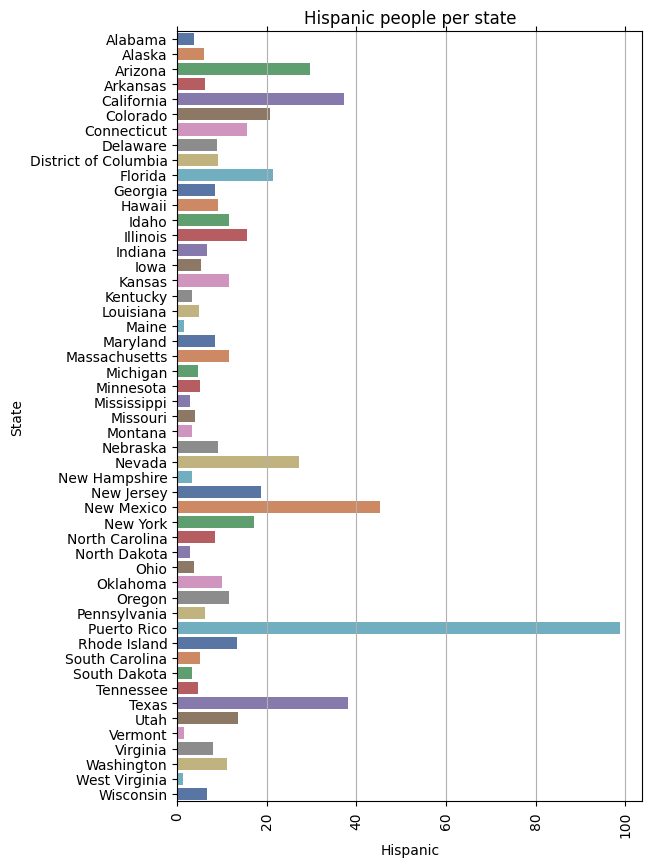

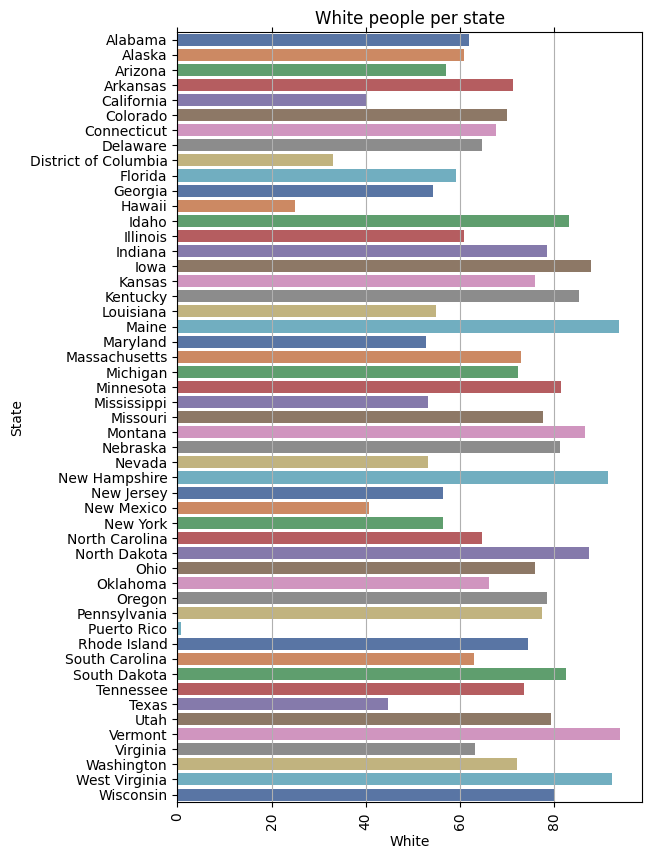

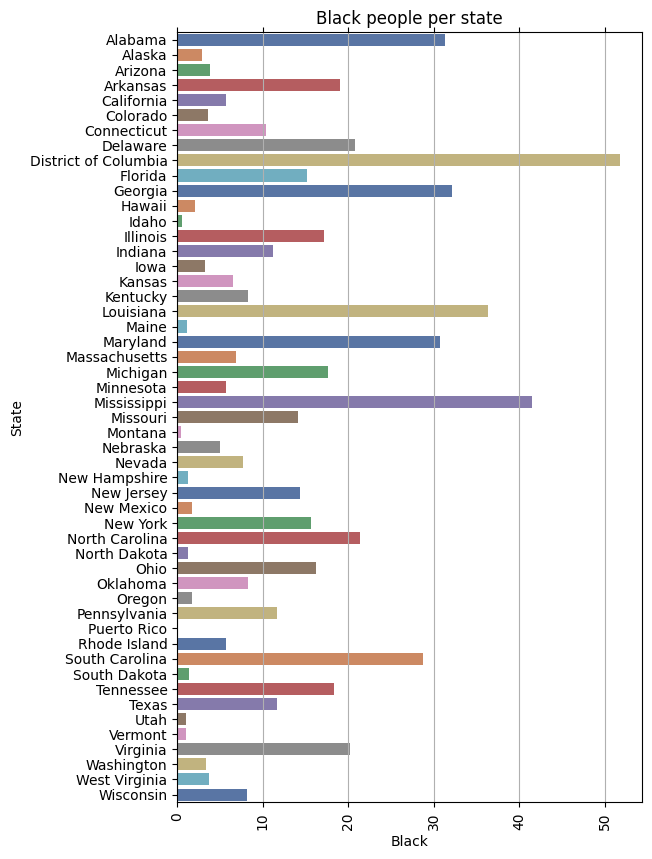

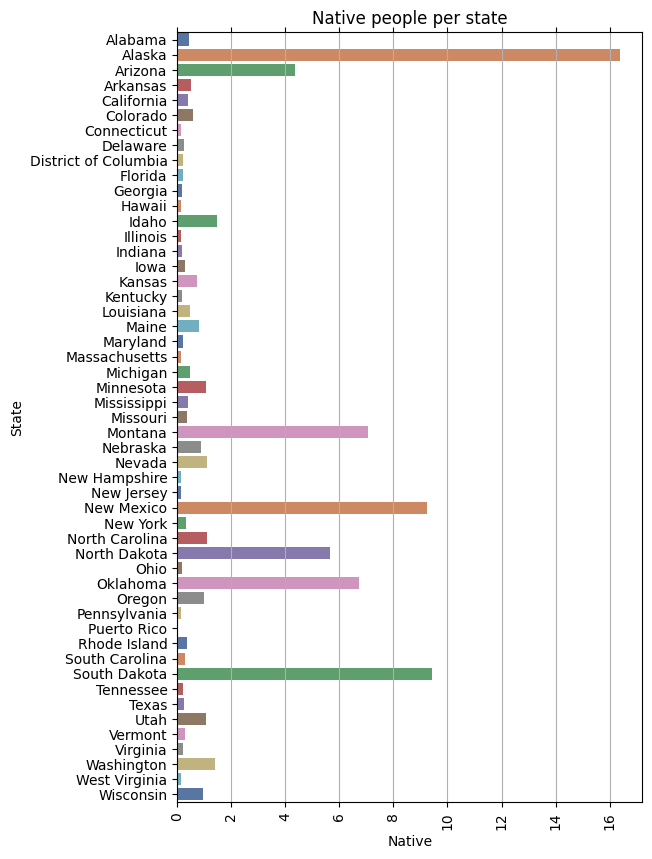

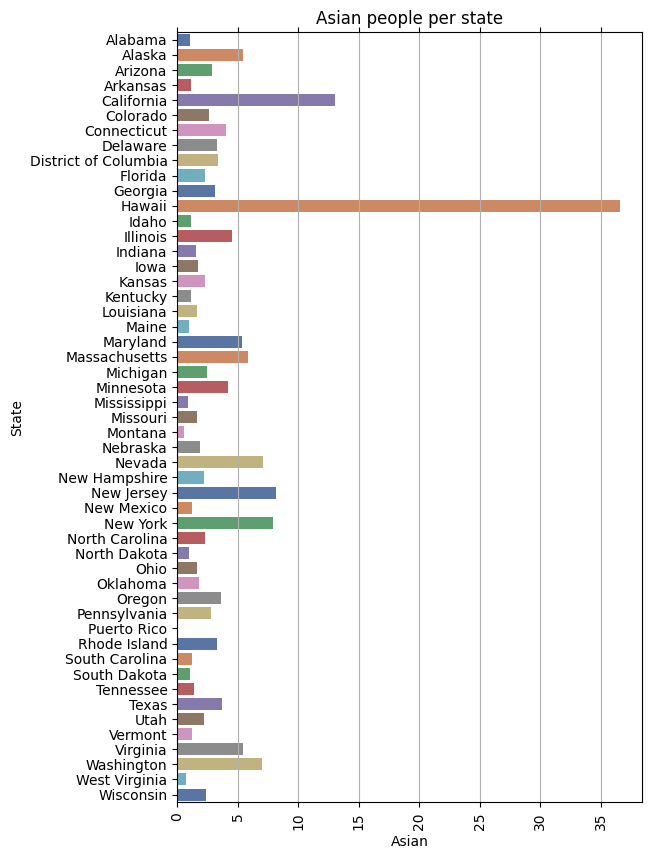

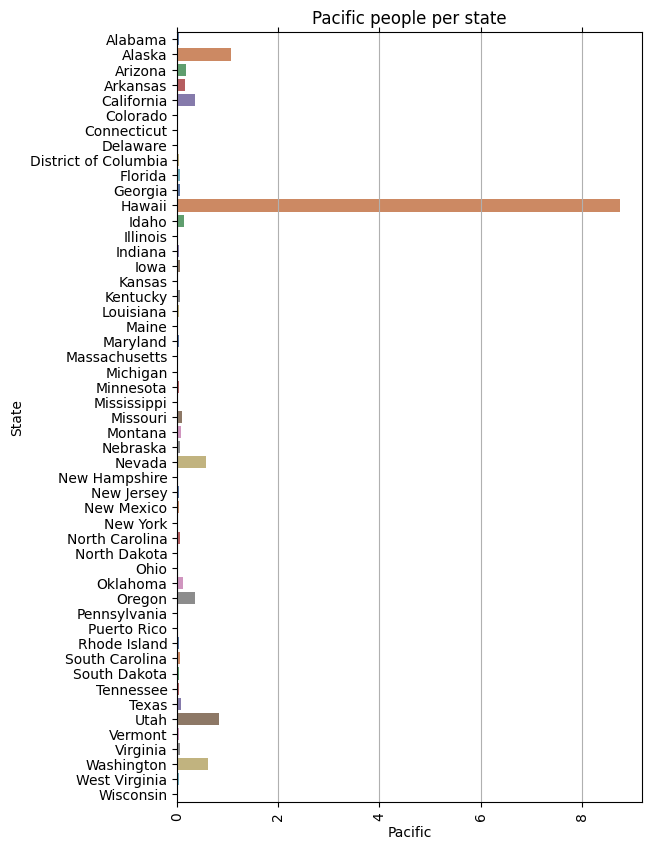

In [103]:
#histograms seem are hard to read here, making bar plots per state
print(us_census.head())

for ethnic in ethnics:
    plt.figure(figsize=(6, 10))
    
    sns.barplot(x=us_census[ethnic], y=us_census['State'], orient='h', palette = 'deep')

    plt.title(f'{ethnic} people per state')
  
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', top=True, bottom=True)
    plt.grid(axis='x')
    
    plt.show()

In [ ]:
# let's melt the df to have 'Ethnicity' column

#print(us_census.head())

#melted_df = pd.melt(us_census, id_vars=['State', 'TotalPop', 'Income', 'Men', 'Women'], 
#                    value_vars=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], 
#                    var_name='Ethnicity', value_name='Population')

# Display the melted DataFrame
#print(melted_df.head(100))

In [ ]:
#import seaborn as sns

#sns.scatterplot(x='TotalPop', y='Income', hue='Ethnicity', data=melted_df)
#plt.show()

### I want to play with maps here

In [118]:
import zipfile
import os

# Specify the path to the uploaded ZIP file
zip_file_path = 'ne_110m_admin_1_states_provinces.zip'

# Specify the directory to extract the contents of the ZIP file
extract_dir = 'extracted_data/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['ne_110m_admin_1_states_provinces.cpg', 'ne_110m_admin_1_states_provinces.dbf', 'ne_110m_admin_1_states_provinces.prj', 'ne_110m_admin_1_states_provinces.README.html', 'ne_110m_admin_1_states_provinces.sbn', 'ne_110m_admin_1_states_provinces.sbx', 'ne_110m_admin_1_states_provinces.shp', 'ne_110m_admin_1_states_provinces.shx', 'ne_110m_admin_1_states_provinces.VERSION.txt']


## Heavily tweaked intense cooperation with Open AI below (full disclosure)

In [342]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import scale, translate

df = us_census

def plot_us_demo(df, ethnic):
    us_census = df

    # Load the shapefile
    shapefile_path = 'extracted_data/ne_110m_admin_1_states_provinces.shp'
    us_states = gpd.read_file(shapefile_path)

    # Merge data
    merged = us_states.merge(us_census, how='left', left_on='name', right_on='State')

    # Define scaling factors for each state
    scaling_factors = {'Alaska': 0.5, 'Hawaii': 2}

    # Scale the geometries of specified states
    for state, factor in scaling_factors.items():
        state_geom = merged.loc[merged['name'] == state, 'geometry'].iloc[0]
        scaled_geom = scale(state_geom, xfact=factor, yfact=factor)
        if state == 'Alaska':
            translated_geom = translate(scaled_geom, xoff=0, yoff=-10)  # Adjust translation values for Alaska
            merged.loc[merged['name'] == state, 'geometry'] = translated_geom
        else:
            merged.loc[merged['name'] == state, 'geometry'] = scaled_geom

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 16))
    merged.plot(column=ethnic, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    ax.set_title(f'{ethnic} People by State')

    # Adjust the limits of the plot axes to remove extra empty space
    ax.set_xlim(-170, -60)
    ax.set_ylim(15, 61)

    # Add colorbar legend
    cb = plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), ax=ax, orientation='horizontal', pad=0.05)
    cb.set_label(f'{ethnic} Population')

    plt.axis('off')
    plt.show()

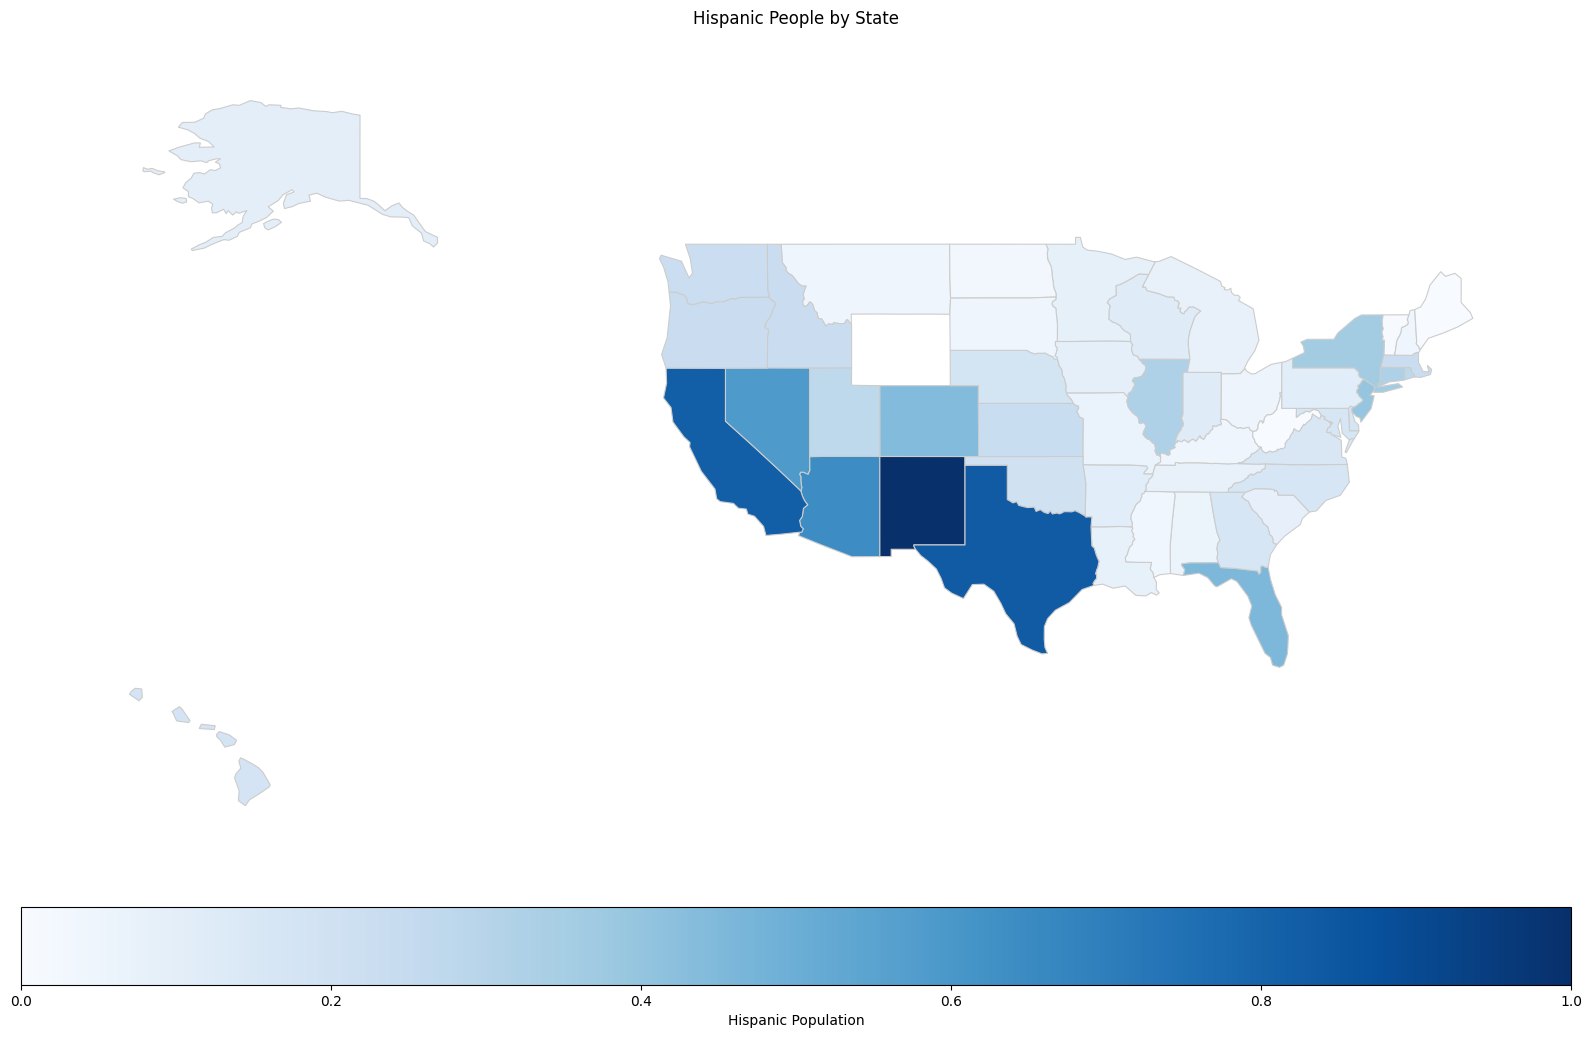

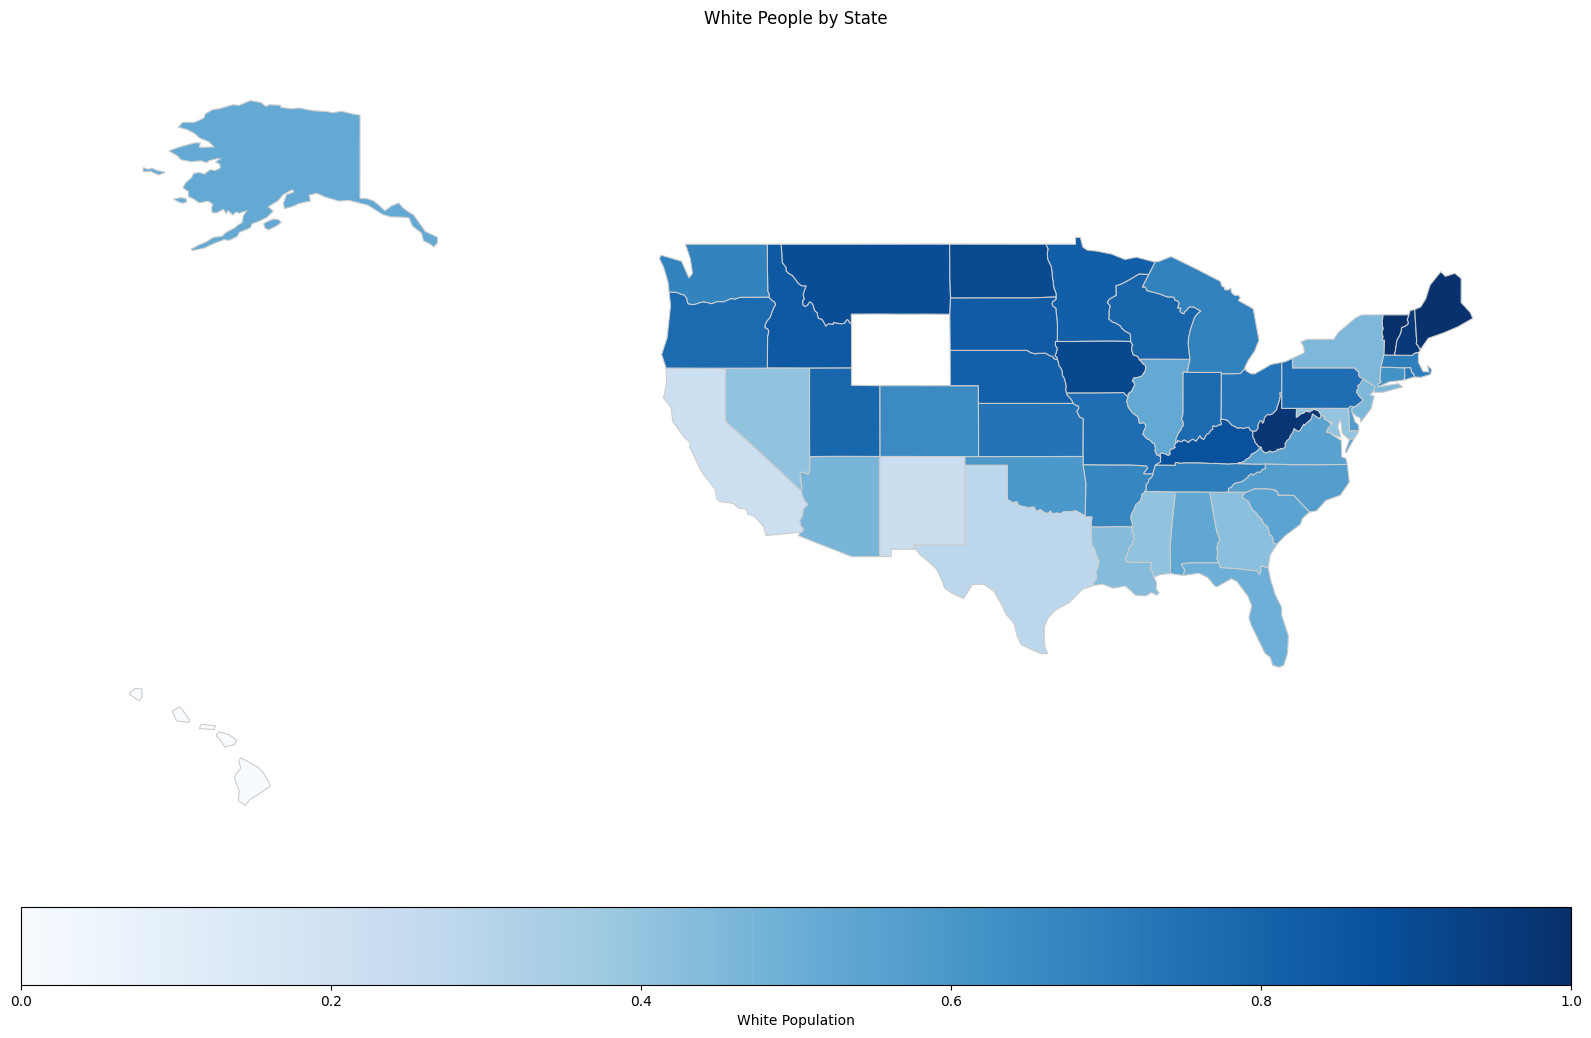

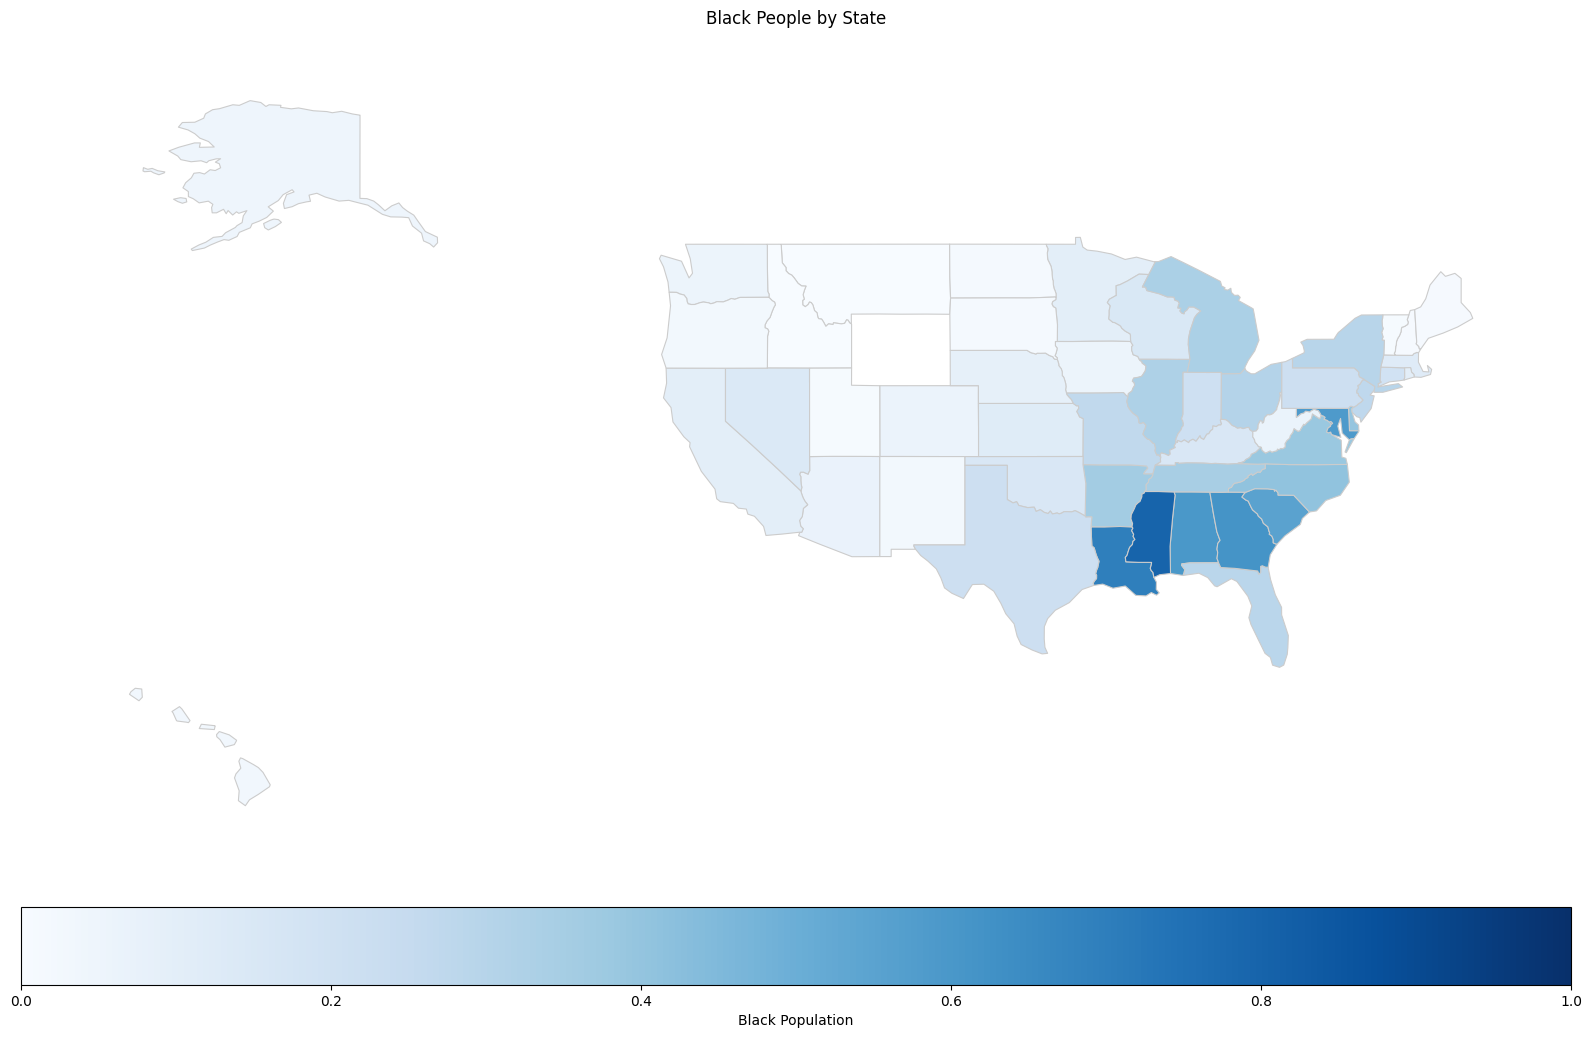

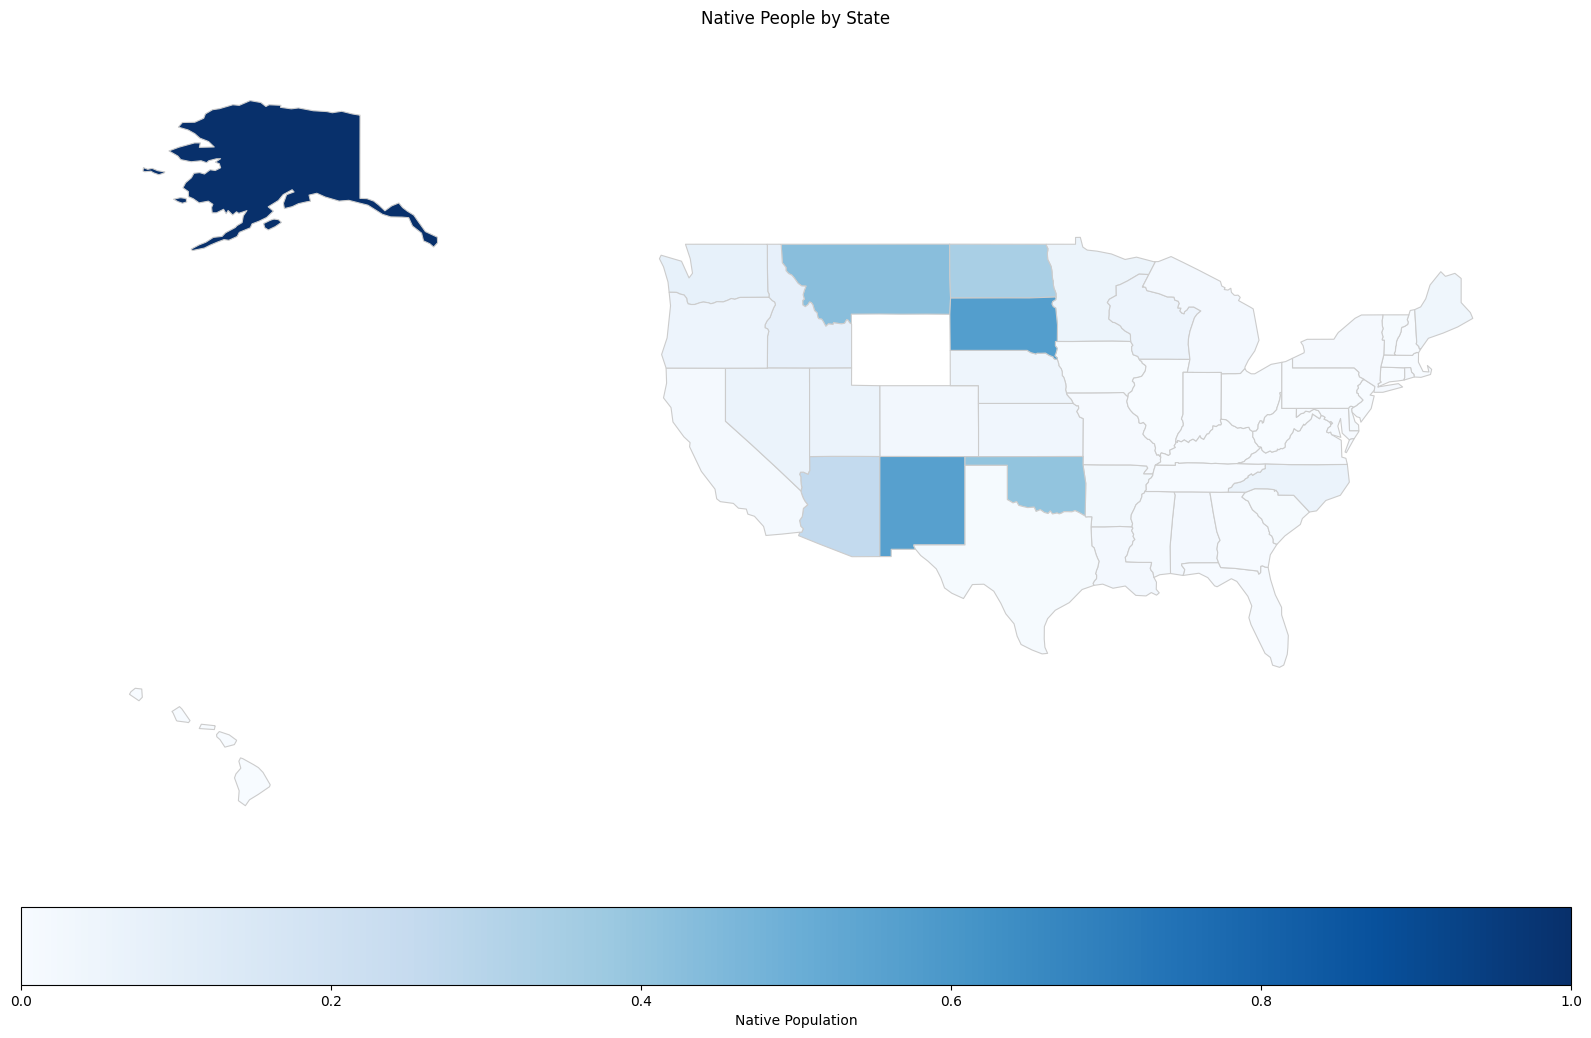

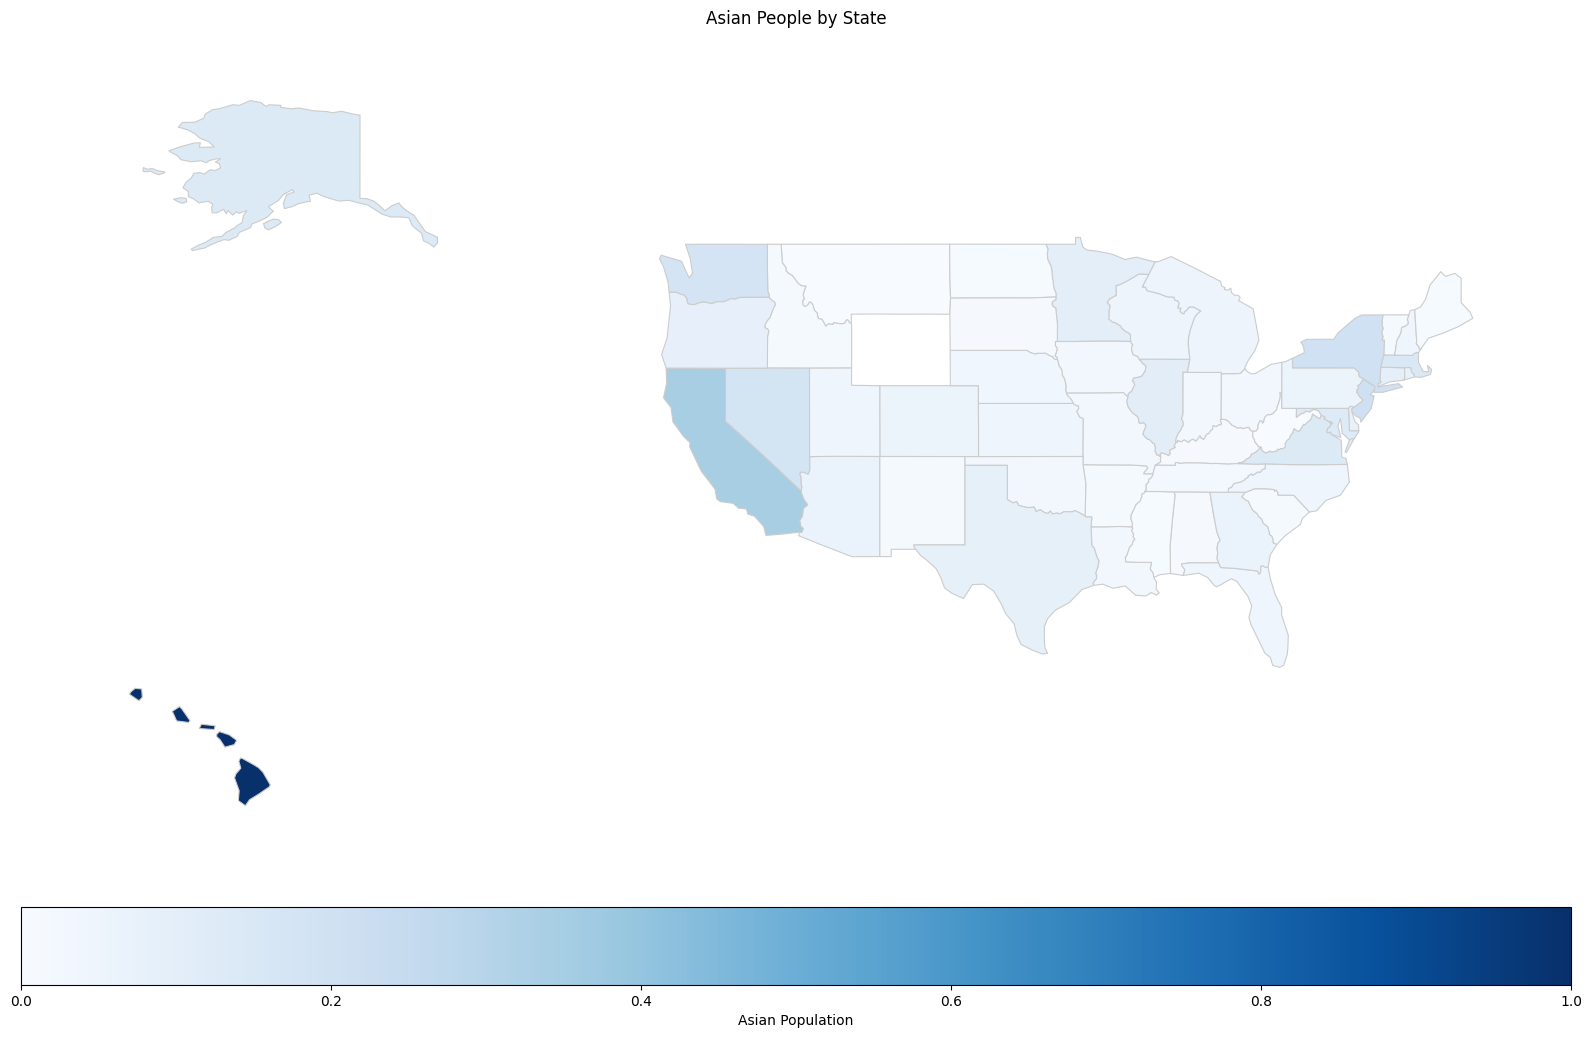

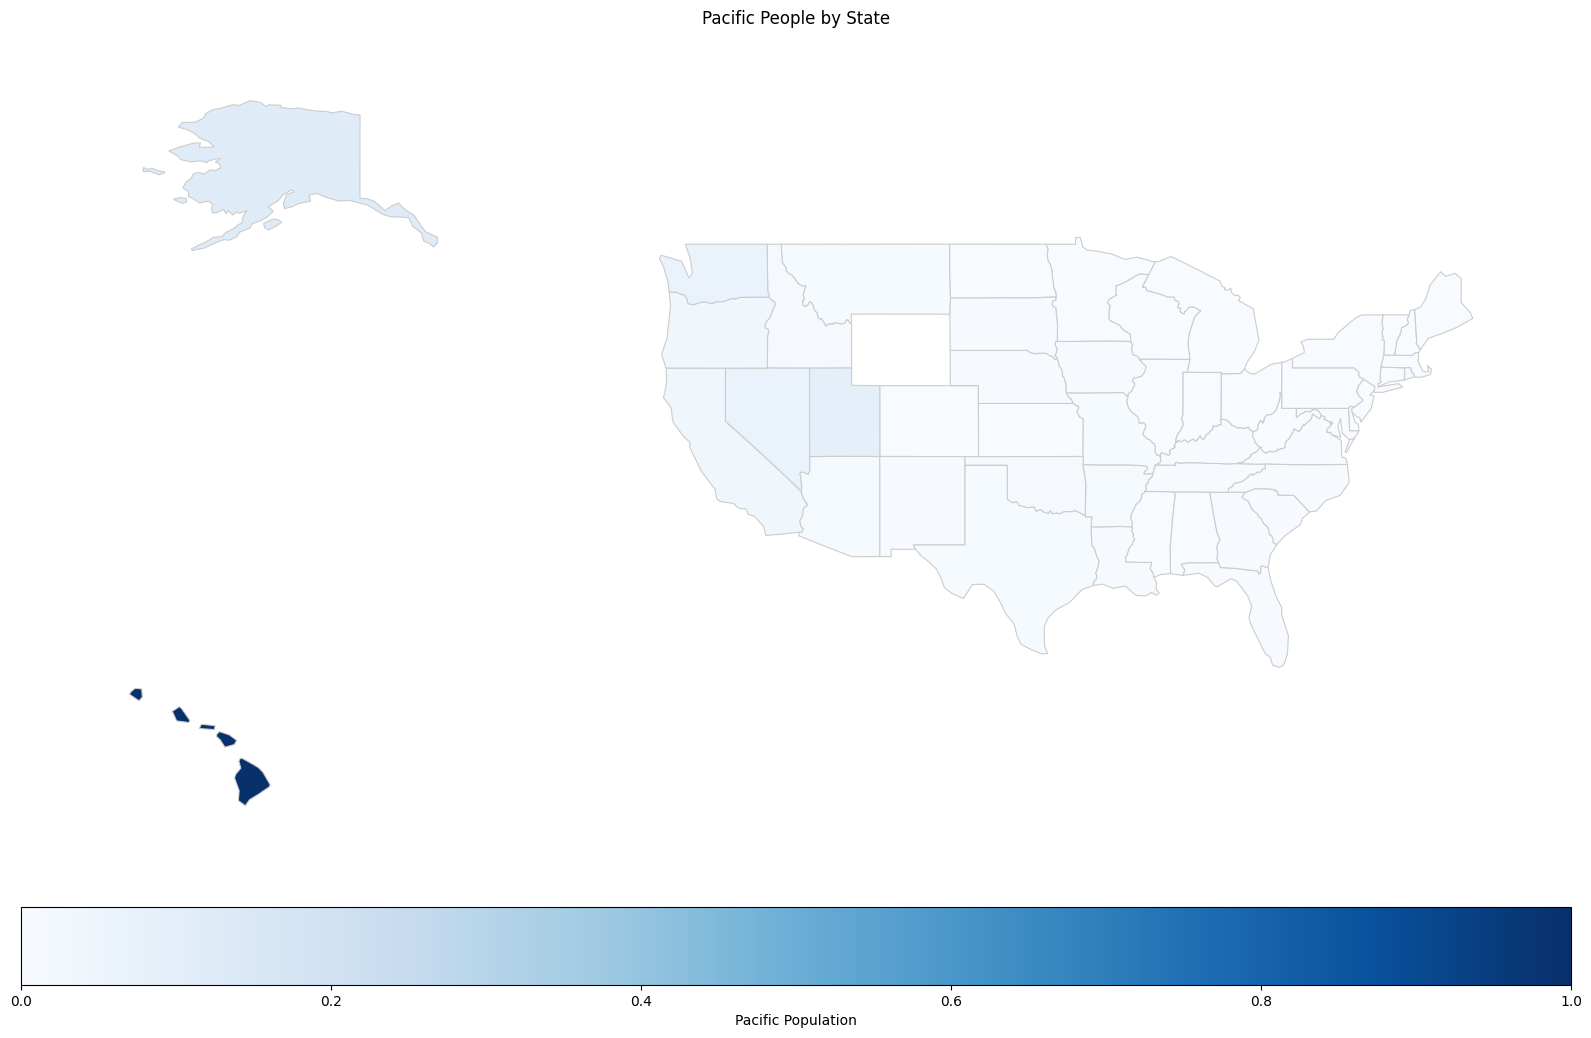

In [336]:
for ethnic in ethnics:
    plot_us_demo(df, ethnic)

### Puerto Rico is missing. Adding it to shapefile -- TO DO ;)

In [316]:
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.affinity import scale, translate
# import matplotlib.pyplot as plt

# Load demographic data
# df = us_census  # Assuming you have already defined us_census

# Load the shapefile
# shapefile_path = 'extracted_data/ne_110m_admin_1_states_provinces.shp'
# us_states = gpd.read_file(shapefile_path)

# Define the geometry coordinates for Puerto Rico
# puerto_rico_coords = [(-66.2824, 18.5148), (-65.7713, 18.4267), (-65.5910, 18.2280),
#                       (-65.8471, 17.9759), (-66.5999, 17.9818), (-67.1842, 17.9466),
#                       (-67.2424, 18.3745), (-67.1007, 18.5206), (-66.2824, 18.5148)]

# Create a GeoDataFrame for Puerto Rico
# puerto_rico_gdf = gpd.GeoDataFrame(geometry=[Polygon(puerto_rico_coords)])

# Append Puerto Rico GeoDataFrame to the existing us_states GeoDataFrame
# us_states_with_pr = gpd.GeoDataFrame(pd.concat([us_states, puerto_rico_gdf], ignore_index=True))